In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

# Planck's formula for Blackbody radiation
$$u(\lambda, T)= \frac{8\pi hc}{\lambda^5}\frac{1}{e^{\frac{hc}{k_bT\lambda}}-1}$$


In [105]:
# Constants
h = 6.62607015e-34  # Planck's constant (J*s)
c = 299792458  # Speed of light (m/s)
k = 1.380649e-23  # Boltzmann constant (J/K)

# Function to calculate Planck's formula
def planck_formula(wavelength, temperature):
    numerator = 8*np.pi*h*c / wavelength**5
    denominator = np.exp((h * c) / (wavelength * k * temperature)) - 1
    return numerator / denominator

# Wavelength range
wavelengths = np.linspace(1e-9, 3e-6, 1000)  # 1 nm to 3 μm


# Let's see can we find the Raleigh-Jeans formula for the room temparature( i.e, 300K)

C:\Users\MRIDUL KAYAL\AppData\Local\Temp\ipykernel_10304\3234295428.py:9: RuntimeWarning: overflow encountered in exp
  denominator = np.exp((h * c) / (wavelength * k * temperature)) - 1


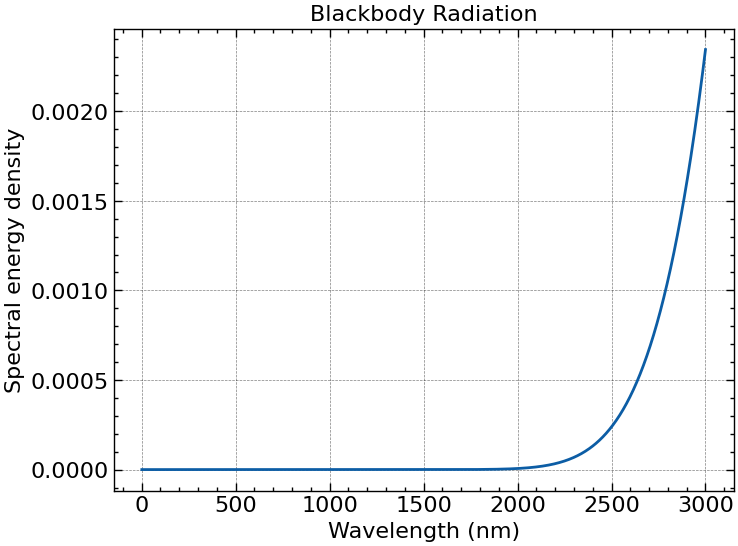

In [106]:
# Temperature
temperature = 300  # in Kelvin

# Calculate intensity using Planck's formula
intensity = planck_formula(wavelengths, temperature)

# Plot the graph
plt.plot(wavelengths * 1e9, intensity)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral energy density')
plt.title('Blackbody Radiation')
plt.show()

# Let's varify the Wien's displacement law

C:\Users\MRIDUL KAYAL\AppData\Local\Temp\ipykernel_10304\3234295428.py:9: RuntimeWarning: overflow encountered in exp
  denominator = np.exp((h * c) / (wavelength * k * temperature)) - 1


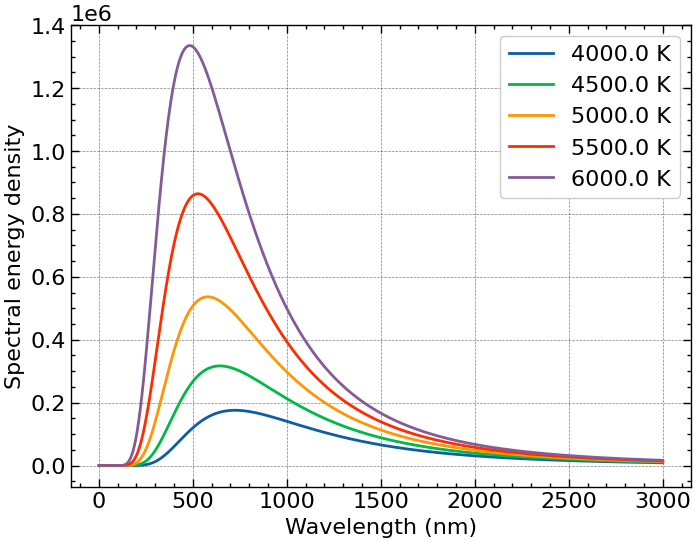

In [107]:
# Temperature
temperature = np.linspace(4000, 6000, 5)  # in Kelvin

for temp in temperature:
    # Calculate intensity using Planck's formula
    intensity = planck_formula(wavelengths, temp)
    
    # Plot the graph
    plt.plot(wavelengths * 1e9, intensity, label=f'{temp} K')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral energy density')
    plt.legend()
plt.show()

## Conclusion
The law(Wien's displacement law) states that $\lambda_M T = b$, $b$ being the Stephan's constant. So as temparature incresease the wavelength corresponding to the maximum energy density decreses.


# Stefan's Blotzman total power law
Total power per unit suface area is *propertional* to forth power of temparature. 
For that we have to *integrate the energy density* over the whole wavelength.

For the sake of verification I suppose that,
$$\int_0^\infty u(\lambda, T)d\lambda \propto T^n$$
We will take the log in both side to linearize the the formula to find $n$ we will find the slope of the graph.

In [108]:
def integrate_planck_formula(temperature):
    # Calculate intensity using Planck's formula
    intensity = planck_formula(wavelengths, temperature)
    
    # Integrate the intensity to get total energy
    total_energy = np.trapz(intensity, wavelengths)
    return total_energy

C:\Users\MRIDUL KAYAL\AppData\Local\Temp\ipykernel_10304\3234295428.py:9: RuntimeWarning: overflow encountered in exp
  denominator = np.exp((h * c) / (wavelength * k * temperature)) - 1


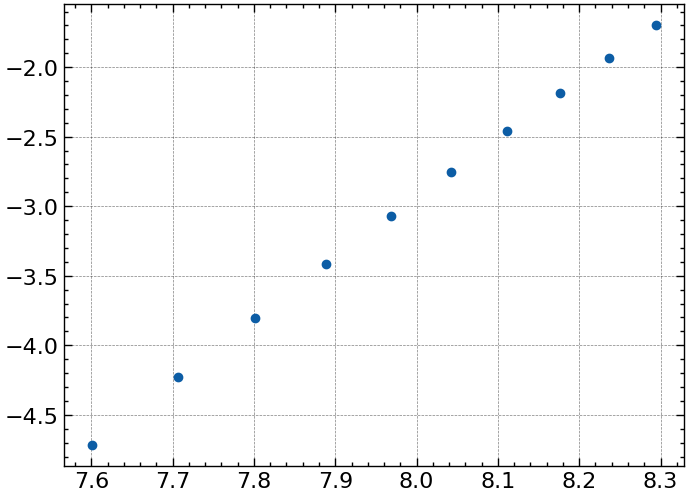

In [109]:
Temp = np.linspace(2000, 4000, 10)
energy = [integrate_planck_formula(temp) for temp in Temp]  
lnT = np.log(Temp)
lnE = np.log(energy)
plt.plot(lnT, lnE, "o")


In [112]:
# Least square fitting
import numpy.linalg as ln
A = np.array([[sum(lnT**2), sum(lnT)],
             [sum(lnT), len(lnT)]])
b = np.array([sum(lnT*lnE), sum(lnE)])

m, c = ln.solve(A, b)
print(f"The value of the n is {m:.2f}")

The value of the n is 4.34


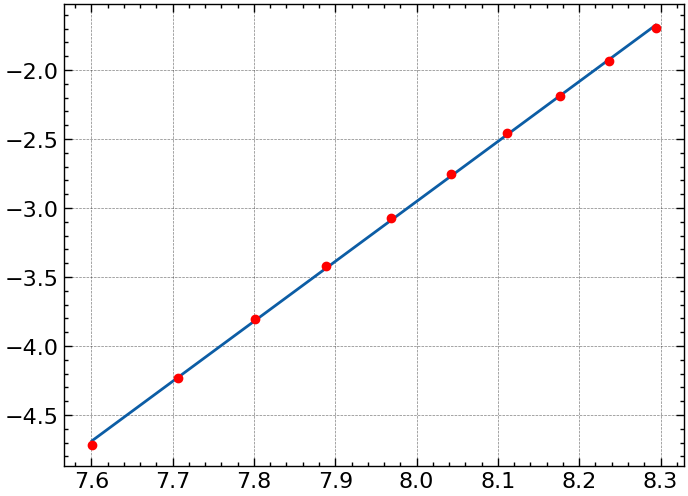

In [111]:
y = m*lnT + c
plt.plot(lnT, y)   
plt.plot(lnT, lnE, "ro") 
plt.show()

## Conclusion
Total energy is propertional to the **nearly 4-th** power of temparature.